# Customer Churn Analysis and Prediction


Customer churn, defined as the rate at which customers leave a company or discontinue its services, is a critical metric for businesses. It has a direct impact on revenue, long-term growth, and customer retention strategies.  

This notebook focuses on analyzing and predicting customer churn in a bank using a dataset that contains diverse customer attributes. The primary objective is to identify the key factors influencing customer churn and to build a machine learning model capable of accurately predicting whether a customer is likely to leave the bank.

---

## Dataset Overview

The dataset contains information related to customer demographics, financial status, and engagement with the bank. These attributes are used to understand customer behavior and predict churn.

---

## Project Objectives

- Explore and understand customer data.
- Identify important features influencing customer churn.
- Apply data preprocessing and feature engineering techniques.
- Build and evaluate machine learning models for churn prediction.
- Select the best-performing model based on evaluation metrics.

---

## Workflow

A structured and systematic workflow is followed to ensure reliable and interpretable results.

### 1. Data Loading and Exploration
- Load the dataset using Pandas.
- Explore the dataset to identify categorical and numerical features.
- Understand the structure and basic characteristics of the data.

### 2. Data Cleaning and Preprocessing
- Check for missing, null, or unknown values.
- Identify and remove duplicate records, if any.
- Ensure data consistency and quality.

### 3. Exploratory Data Analysis (EDA)
- Perform in-depth analysis to uncover patterns, trends, and relationships.
- Use visualizations such as:
  - Histograms
  - Box plots
  - Heatmaps
  - Scatter plots  
- Identify key predictors of customer churn.

### 4. Feature Engineering
- Apply appropriate feature transformation techniques.
- Encode categorical variables into numerical formats suitable for machine learning models.
- Scale numerical features to improve model performance.

### 5. Machine Learning Modeling
- Split the dataset into training and testing sets.
- Train and compare multiple machine learning algorithms.
- Perform hyperparameter tuning to optimize model performance.

### 6. Model Evaluation and Conclusion
- Evaluate model performance using metrics such as:
  - Accuracy
  - Precision
  - Recall
  - F1-score
- Analyze results and draw conclusions about the most effective churn prediction approach.

---

## Dataset Description

### 1. Categorical Variables

**Geography**  
- Country of the customer  
- Example values: France, Spain, Germany  

**Gender**  
- Customer’s gender  
- Example values: Male, Female  

**Tenure**  
- Number of years the customer has been with the bank  
- Example values: 1, 5, 10  

**HasCrCard**  
- Indicates whether the customer has a credit card  
- Values: 1 (Yes), 0 (No)  

**NumOfProducts**  
- Number of bank products used by the customer  
- Example values: 1, 2, 3  

**Exited**  
- Indicates whether the customer has left the bank  
- Values: 1 (Exited), 0 (Retained)  

**IsActiveMember**  
- Indicates whether the customer is an active member  
- Values: 1 (Yes), 0 (No)  

**PostExitQuestionnaire**  
- Indicates whether a questionnaire was sent after exit  
- Values: 1 (Distributed), 0 (Not Distributed)  

---

### 2. Continuous Variables

**CreditScore**  
- Customer’s credit score  
- Example values: 450, 750, 850  

**Balance**  
- Bank account balance  
- Example values: 0.00, 50,000.00, 120,000.00  

**Age**  
- Age of the customer  
- Example values: 25, 40, 60  

**EstimatedSalary**  
- Estimated annual salary  
- Example values: $20,000.00, $80,000.00, $200,000.00  

---

By following this structured approach, the project aims to develop a robust and interpretable machine learning model capable of effectively predicting customer churn in the banking sector.


# 1. Importing Libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import chi2_contingency

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost.sklearn import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

print("All Libraries Imported successfully")

All Libraries Imported successfully


# 2. Loading Dataset

In [84]:
# Using first column as index
customers_train = pd.read_csv("../data/data_train.csv", index_col = 0 )
customers_test = pd.read_csv("../data/data_test.csv", index_col = 0 )

In [85]:
customers_train.head(5) # top five rows of data set

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,PostExitQuestionnaire
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


# 3. Data Exploration + Pre-Processing

In [86]:
customers_train.info() # Seems like data has no missing values

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CreditScore            8000 non-null   int64  
 1   Geography              8000 non-null   object 
 2   Gender                 8000 non-null   object 
 3   Age                    8000 non-null   int64  
 4   Tenure                 8000 non-null   int64  
 5   Balance                8000 non-null   float64
 6   NumOfProducts          8000 non-null   int64  
 7   HasCrCard              8000 non-null   int64  
 8   IsActiveMember         8000 non-null   int64  
 9   EstimatedSalary        8000 non-null   float64
 10  Exited                 8000 non-null   int64  
 11  PostExitQuestionnaire  8000 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 812.5+ KB


In [87]:
customers_train["Geography"].value_counts()

Geography
France     4010
Spain      1995
Germany    1995
Name: count, dtype: int64

In [88]:
customers_train["Gender"].value_counts()

Gender
Male      4343
Female    3657
Name: count, dtype: int64

In [89]:
def convert_to_category(data_train, data_test, columns):
    
    for column in columns:
        data_train[column] = data_train[column].astype("category")
        data_test[column] = data_test[column].astype("category")
    
    return data_train, data_test
    
columns_to_convert = ['Gender', 'Geography']
customers_train, customers_test = convert_to_category(customers_train, customers_test, columns_to_convert)

In [90]:
customers_train.isna().sum() # No missing or null values 

CreditScore              0
Geography                0
Gender                   0
Age                      0
Tenure                   0
Balance                  0
NumOfProducts            0
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
Exited                   0
PostExitQuestionnaire    0
dtype: int64

In [91]:
customers_train.duplicated().sum() # No duplicate values

np.int64(0)

In [92]:
customers_train.describe().T # Descriptive stats for our datset descriving mean, std deviation and other measures


,count,mean,std,min,25%,50%,75%,max
CreditScore,8000.0,650.179625,96.844314,350.00,583.00,651.000,717.0000,850.00
Age,8000.0,38.937875,10.511224,18.00,32.00,37.000,44.0000,92.00
Tenure,8000.0,5.012750,2.884376,0.00,3.00,5.000,7.0000,10.00
Balance,8000.0,76800.037193,62391.192584,0.00,0.00,97658.060,127827.3325,250898.09
NumOfProducts,8000.0,1.528000,0.583102,1.00,1.00,1.000,2.0000,4.00
HasCrCard,8000.0,0.701625,0.457574,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,8000.0,0.512625,0.499872,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,8000.0,100198.588701,57524.002768,11.58,51271.41,100272.165,149372.3875,199992.48
Exited,8000.0,0.205875,0.404365,0.00,0.00,0.000,0.0000,1.00
PostExitQuestionnaire,8000.0,0.183750,0.387304,0.00,0.00,0.000,0.0000,1.00


In [93]:
# Function to rename columns and set them to lowercase
def preprocess_columns(df, mapper):
    df.rename(columns=mapper, inplace=True)
    df.columns = df.columns.str.lower()
    return df

# Column mapping
customers_mapper = {
    "CreditScore": "credit_score", 
    "NumOfProducts": "num_of_products", 
    "HasCrCard": "has_credit_card",
    "IsActiveMember": "is_active_member", 
    "EstimatedSalary": "estimated_salary", 
    "PostExitQuestionnaire": "post_exit_questionnaire"
}

# Apply preprocessing to both train and test datasets
customers_train = preprocess_columns(customers_train, customers_mapper)
customers_test = preprocess_columns(customers_test, customers_mapper)

# Print test columns to confirm
print(customers_train.columns)


Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_credit_card', 'is_active_member',
       'estimated_salary', 'exited', 'post_exit_questionnaire'],
      dtype='object')


# 4.1 EDA (Exploratory Data Analysis)

## 4.1.1 Univariate Analysis

To start the analysis, we will first perform **univariate analysis** on the dataset. This involves examining individual variables to understand their distributions and key characteristics.

- **Categorical Variables:** We will analyze variables like `Geography`, `Gender`, `NumOfProducts`, `Tenure`, `PostExitQuestionnaire`, `IsActiveMember`, `HasCrCard` and our target variable `Exited` using count plots to visualize the frequency of each category.

- **Continuous Variables:** For variables like `CreditScore`, `Balance`, and `Age`, we will use histograms and box plots to observe their distributions, outliers, and overall trends.


In [94]:
def plot_countplots(df, columns, titles, figsize=(20, 25)):

    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Determine the number of rows and columns needed for the subplots
    n_cols = 2  # You can change this if you prefer a different layout
    n_rows = (len(columns) + 1) // n_cols  # To ensure enough rows for all columns
    
    # Loop through the columns and titles and create subplots
    for i, (col, title) in enumerate(zip(columns, titles)):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.gca().set_title(title)
        sns.countplot(x=col, data=df, palette="Set2", legend = False, hue = col)
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    plt.show()

# Example usage:
columns = ['geography', 'gender', 'tenure',
       'num_of_products', 'has_credit_card', 'is_active_member', 'exited', "post_exit_questionnaire"]

titles = [
    'Customer Geography Distribution',
    'Customer Gender Breakdown',
    'Customer Tenure Distribution',
    'Number of Products Owned by customers_train',
    'Credit Card Ownership Distribution',
    'Active vs. Inactive Membership',
    'Customer Exit Distribution',
    'Distribution of Post-Exit Questionnaire Responses'
]

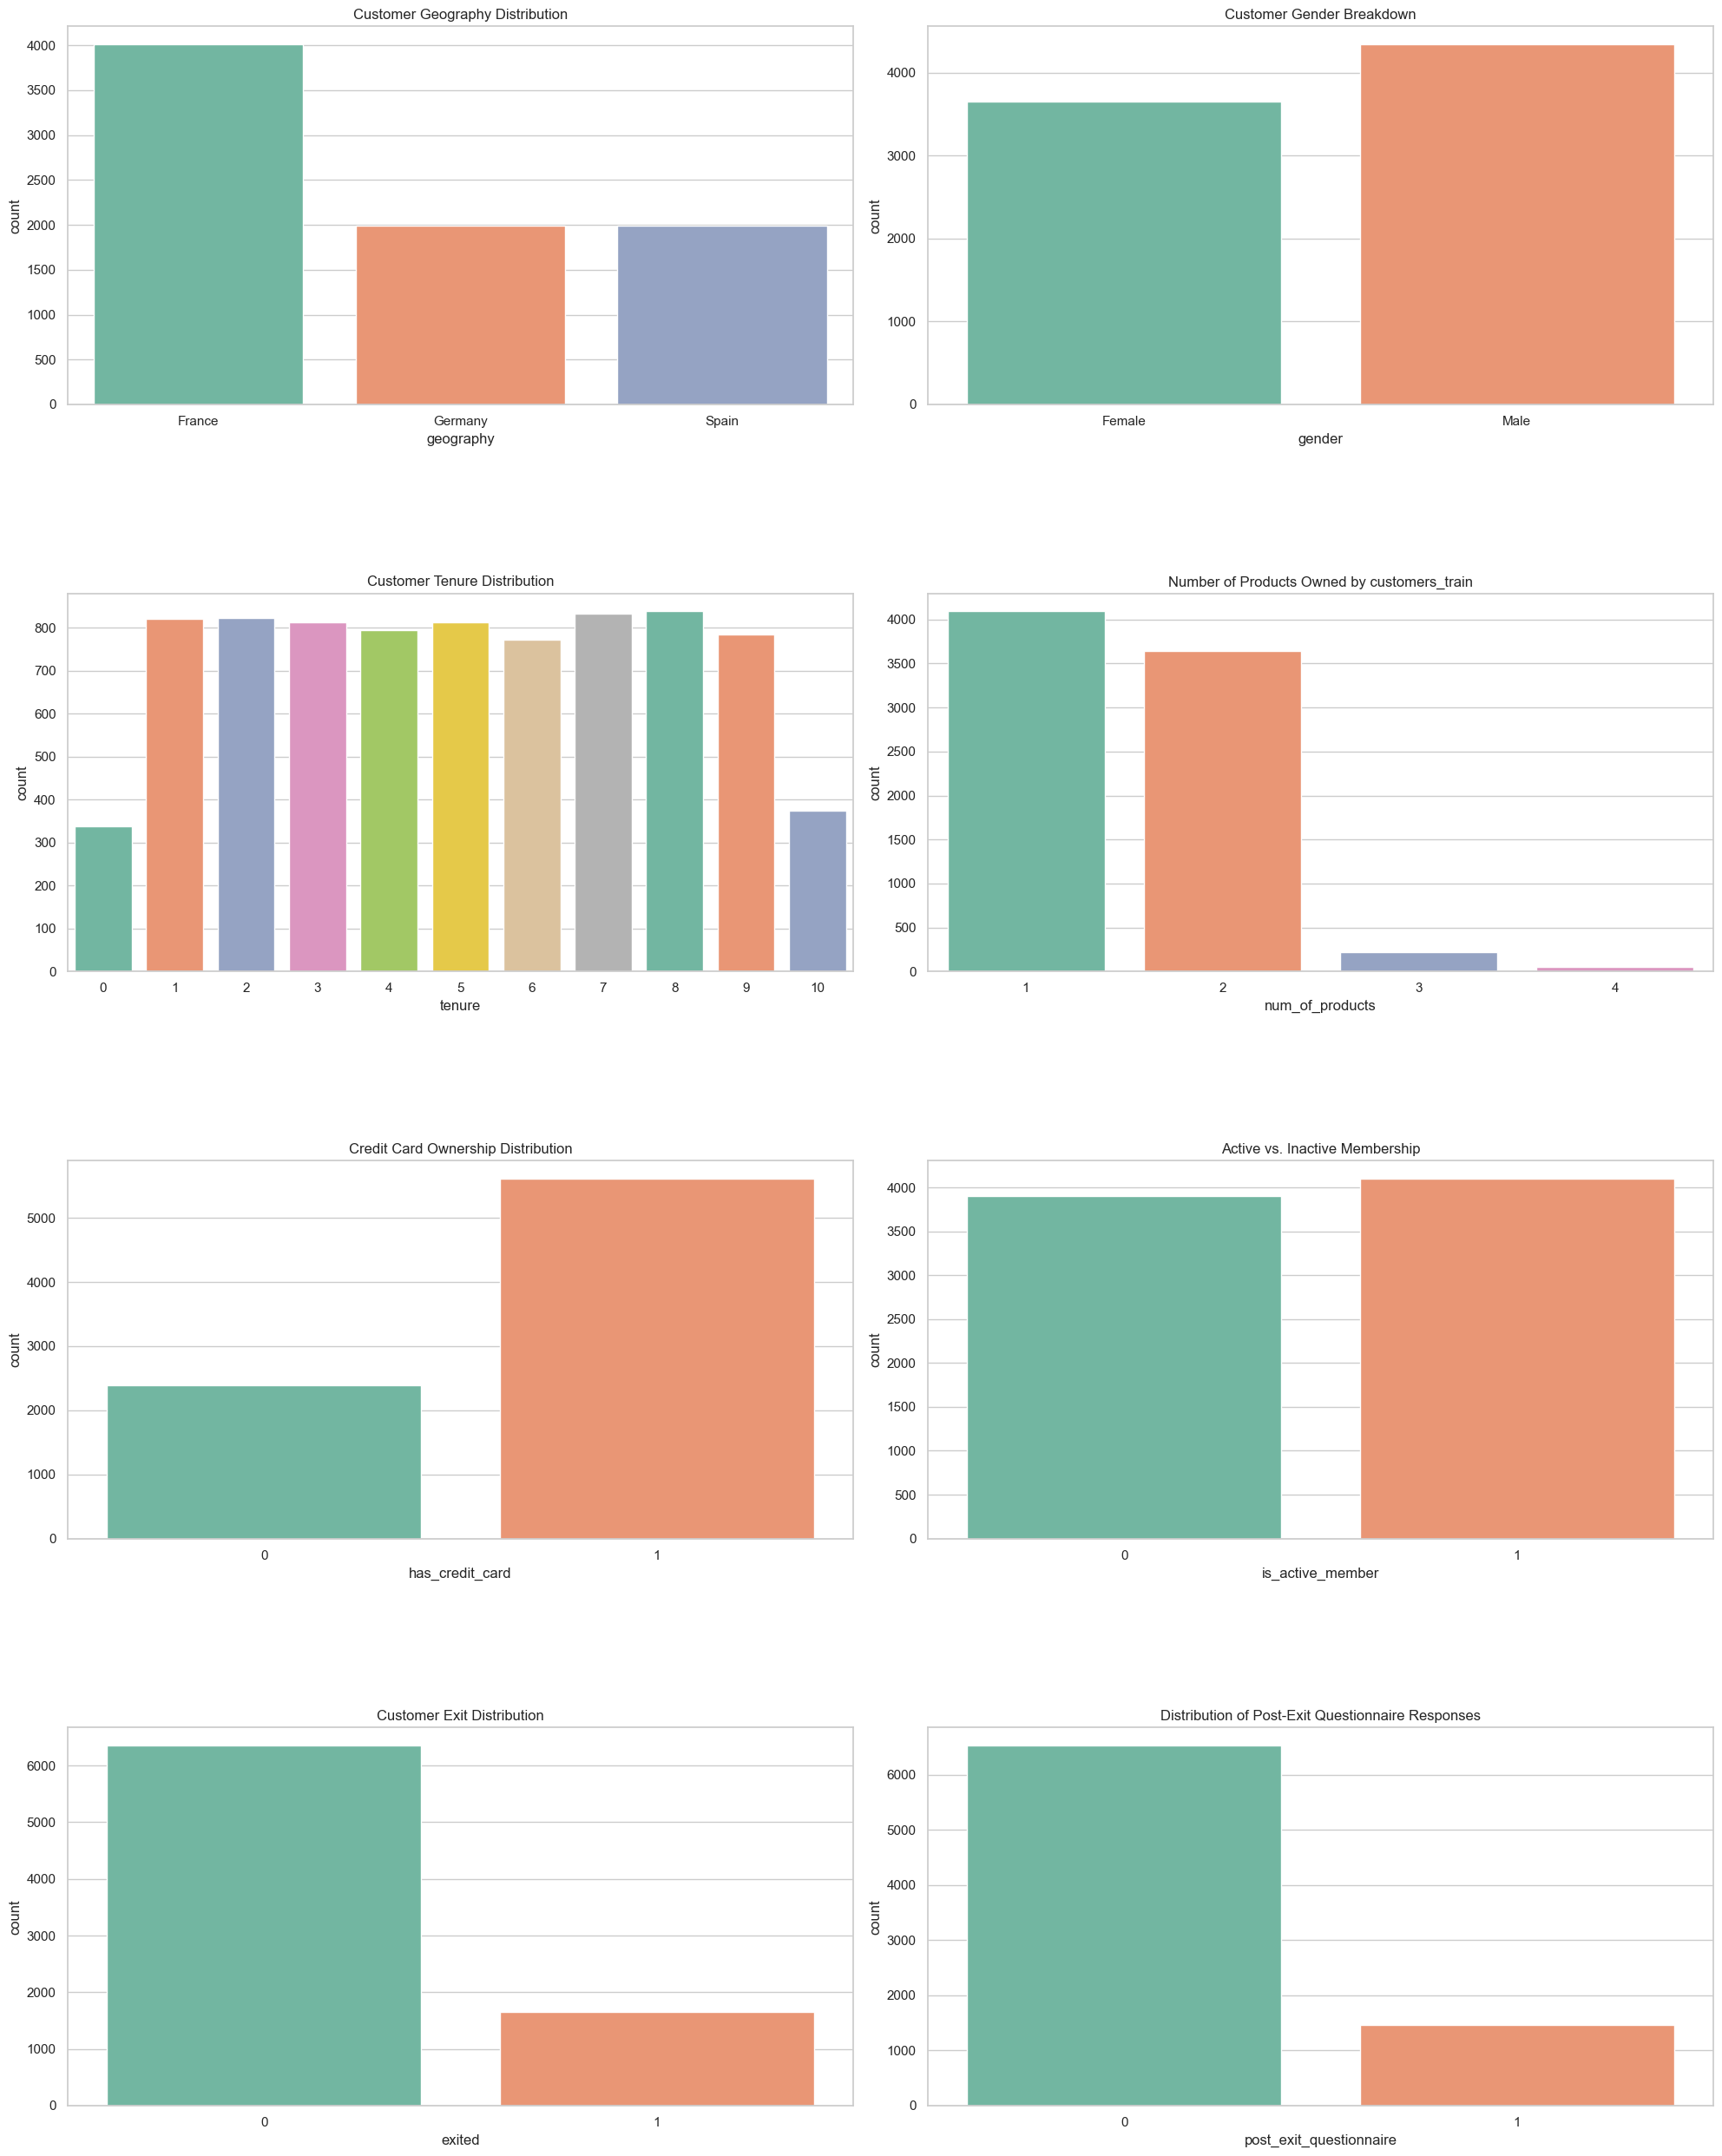

In [95]:
plot_countplots(customers_train, columns, titles)

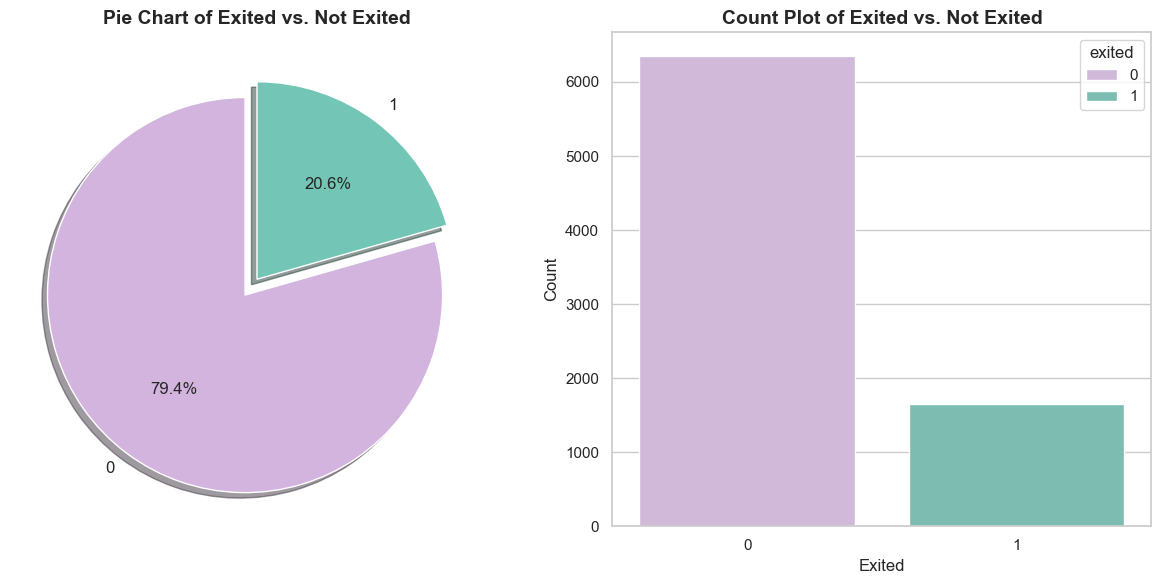

In [96]:
exit_count = customers_train['exited'].value_counts()


fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Pie Chart
colors = ['#d2b4de', '#73c6b6']  # Stylish colors
explode = (0.1, 0)  # Explode the first slice slightly
exit_count.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    labels=exit_count.index,
    shadow=True,
    fontsize=12,
    ax=axes[0]  # Specify the first subplot
)
axes[0].set_title('Pie Chart of Exited vs. Not Exited', fontsize=14, fontweight='bold')
axes[0].set_ylabel('')  # Remove y-label for the pie chart

# Count Plot
sns.countplot(
    x='exited',
    data=customers_train,
    palette=colors,
    hue = 'exited',
    ax=axes[1]  # Specify the second subplot
)
axes[1].set_title('Count Plot of Exited vs. Not Exited', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Exited')  # Label for x-axis
axes[1].set_ylabel('Count')  # Label for y-axis


plt.tight_layout()
plt.show()

### Target Variable (`Exited`)

- The dataset is imbalanced with respect to the `Exited` variable.
- Approximately 80% of customers have **not exited** the bank.
- A significantly smaller portion of customers **have exited** the bank.

- **Implications:**
  - The class imbalance may introduce bias in predictive models.
  - Models could favor the majority class if not addressed.
  - Dataset balancing techniques may be needed in later modeling stages.


### Geography

- Approximately half of the customers belong to **France** (50.12%).
- Fewer customers are from **Spain** (24.93%) and **Germany** (24.93%).

- **Implications:**
  - The imbalance could introduce **regional bias** in predictions.
  - The relevance of geography to the target variable (`Exited`) should be investigated.


### Number of Products

- Most customers utilize **1 or 2 products**.
- Very few customers use **more than 2 products**.

- **Implications:**
  - Limited variability in this feature might affect its **predictive power**.
  - Examine the relationship between **number of products** and **customer exit rates** to determine its significance.


### Credit Card Ownership (`HasCrCard`)

- Almost **twice as many customers own a credit card** compared to those who do not.

- **Implications:**
  - Although this feature looks imbalanced, it should be **explored further** in relation to the `Exited` column.


### Post Exit Questionnaire (`PostExitQuestionnaire`)

- Distribution follows the **same pattern as the `Exited` column**, suggesting almost all customers who exited were given these questionnaires.

- **Implications:**
  - This feature appears imbalanced.
  - **Dropping this column** is recommended as it does not affect the exit status of a customer and could introduce **bias**, preventing the model from learning from other features.


### Other Variables

- Variables like `Gender` (Male 52.28%, Female 45.71%), `IsActiveMember`, and `Tenure` appear **balanced across categories**.

- **Implications:**
  - These variables are **unlikely to introduce significant bias**.
- **Recommendation:**
  - Retain these variables as-is for further analysis.

In [97]:
def plot_histplots(df, columns, titles, figsize=(20, 12)):

    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Determine the number of rows and columns needed for the subplots
    n_cols = 2  # You can change this if you prefer a different layout
    n_rows = (len(columns) + 1) // n_cols  # To ensure enough rows for all columns
    
    # Loop through the columns and titles and create subplots
    for i, (col, title) in enumerate(zip(columns, titles)):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.gca().set_title(title)
        sns.histplot(df[col], kde=True, bins=30, color='#48c9b0')
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

def plot_boxplots(df, columns, titles, figsize=(20, 12)):
    """
    Function to plot box plots for the given columns.
    """
    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Determine the number of rows and columns needed for the subplots
    n_cols = 2  # Number of plots in each row
    n_rows = (len(columns) + 1) // n_cols  # Calculate rows required to fit all columns
    
    # Loop through the columns and titles and create subplots
    for i, (col, title) in enumerate(zip(columns, titles)):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.gca().set_title(title)
        sns.boxplot(y=df[col], color='#abebc6')
        plt.ylabel(col.capitalize())
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()




# Example usage:
columns = ['credit_score','age', 'balance','estimated_salary']

titles = [
    'Customer Credit Score Distribution',
    'Customer Age Distribution',
    'Customer Balance Distribution',
    'Customer Estimated Salary Distribution'
]

box_plot_titles = [
    'Customer Credit Score Distribution (Box Plot)',
    'Age Distribution (Box Plot)',
    'Balance Distribution (Box Plot)',
    'Estimated Salary Distribution (Box Plot)'
]

In [98]:
def plot_histplots(df, columns, titles, figsize=(20, 12)):

    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Determine the number of rows and columns needed for the subplots
    n_cols = 2  # You can change this if you prefer a different layout
    n_rows = (len(columns) + 1) // n_cols  # To ensure enough rows for all columns
    
    # Loop through the columns and titles and create subplots
    for i, (col, title) in enumerate(zip(columns, titles)):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.gca().set_title(title)
        sns.histplot(df[col], kde=True, bins=30, color='#48c9b0')
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

def plot_boxplots(df, columns, titles, figsize=(20, 12)):
    """
    Function to plot box plots for the given columns.
    """
    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Determine the number of rows and columns needed for the subplots
    n_cols = 2  # Number of plots in each row
    n_rows = (len(columns) + 1) // n_cols  # Calculate rows required to fit all columns
    
    # Loop through the columns and titles and create subplots
    for i, (col, title) in enumerate(zip(columns, titles)):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.gca().set_title(title)
        sns.boxplot(y=df[col], color='#abebc6')
        plt.ylabel(col.capitalize())
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()




# Example usage:
columns = ['credit_score','age', 'balance','estimated_salary']

titles = [
    'Customer Credit Score Distribution',
    'Customer Age Distribution',
    'Customer Balance Distribution',
    'Customer Estimated Salary Distribution'
]

box_plot_titles = [
    'Customer Credit Score Distribution (Box Plot)',
    'Age Distribution (Box Plot)',
    'Balance Distribution (Box Plot)',
    'Estimated Salary Distribution (Box Plot)'
]

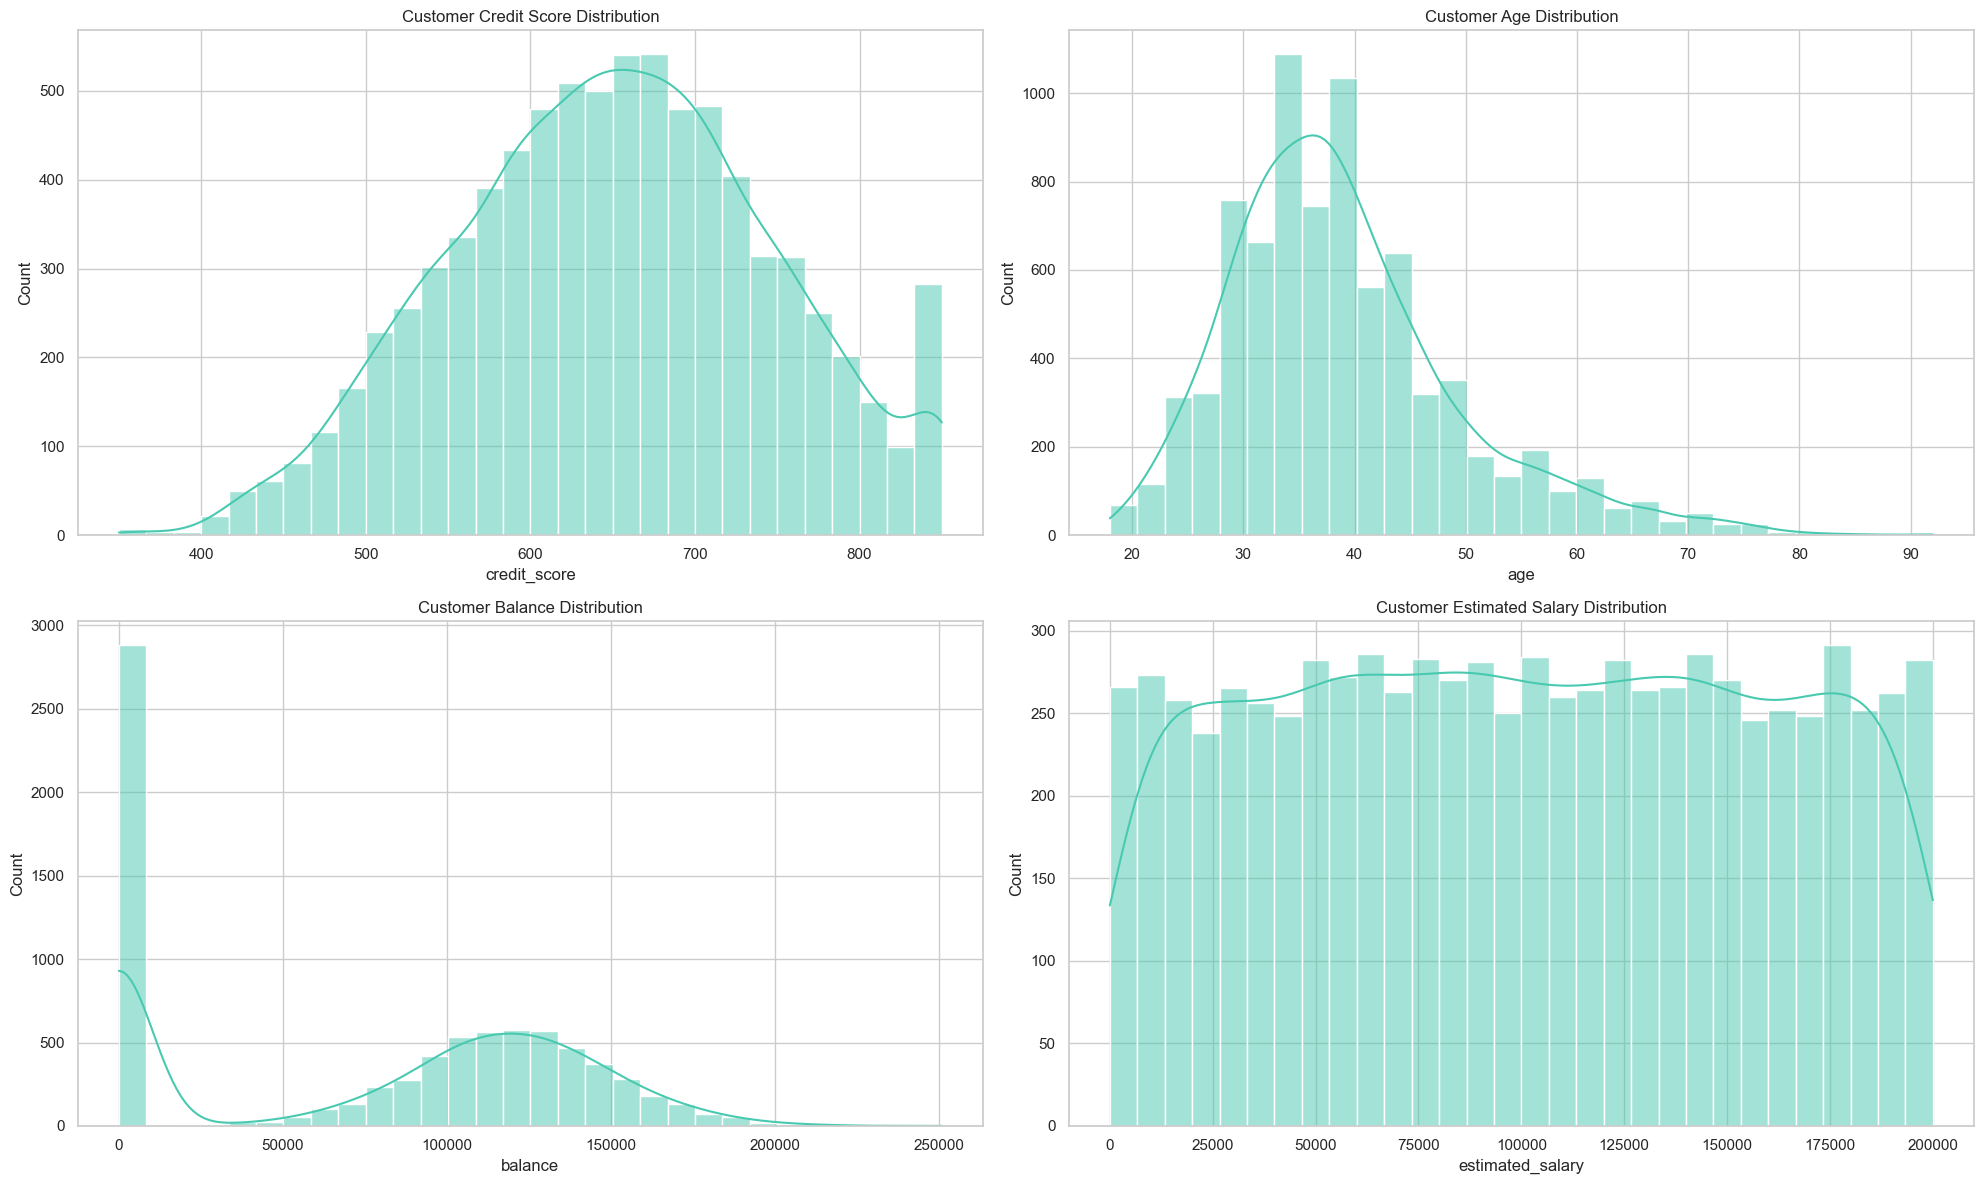

In [99]:
plot_histplots(customers_train, columns, titles)

We notice there are many customers who have **zero balance** so maybe we can create another feature from it but for now I am including the info if the user has zero balance or not to have more predictive power. We will explore it later. Moreover, the age column look right skewed. We will perform some transformation method on it to make its distribution look normally distributed. Credit score column also looks a little bit skewed from left

In [100]:
zero_balance_customers = customers_train[customers_train["balance"] == 0].value_counts().sum()
zero_balance_customers

np.int64(2880)

In [101]:
total_customers = len(customers_train)
zero_balance_customer_pct = (zero_balance_customers / total_customers) * 100
zero_balance_customer_pct

np.float64(36.0)

## Key Observations from Histograms of Continuous Variables

### Credit Score
- Most customers have credit scores between **600 and 750**, which appears to be a normal distribution.
- A small number of customers have credit scores **below 500**; these customers may be at a higher risk of exiting and are worth closer analysis.

### Age
- The majority of customers fall within their **30s and 40s**, indicating this is the primary age group of the bank’s customer base.

### Balance
- Around **36% (2,800 customers)** have a **zero balance**, which may indicate inactive accounts or low engagement with the bank.
- Among customers with a positive balance, the distribution is quite broad, with a peak around **$100,000**, suggesting a segment of active, high-value customers.

### Estimated Salary
- The salary distribution is nearly **uniform**, with no significant peaks.
- This suggests that salary is unlikely to introduce bias into the model; however, its relationship with customer churn should still be examined.


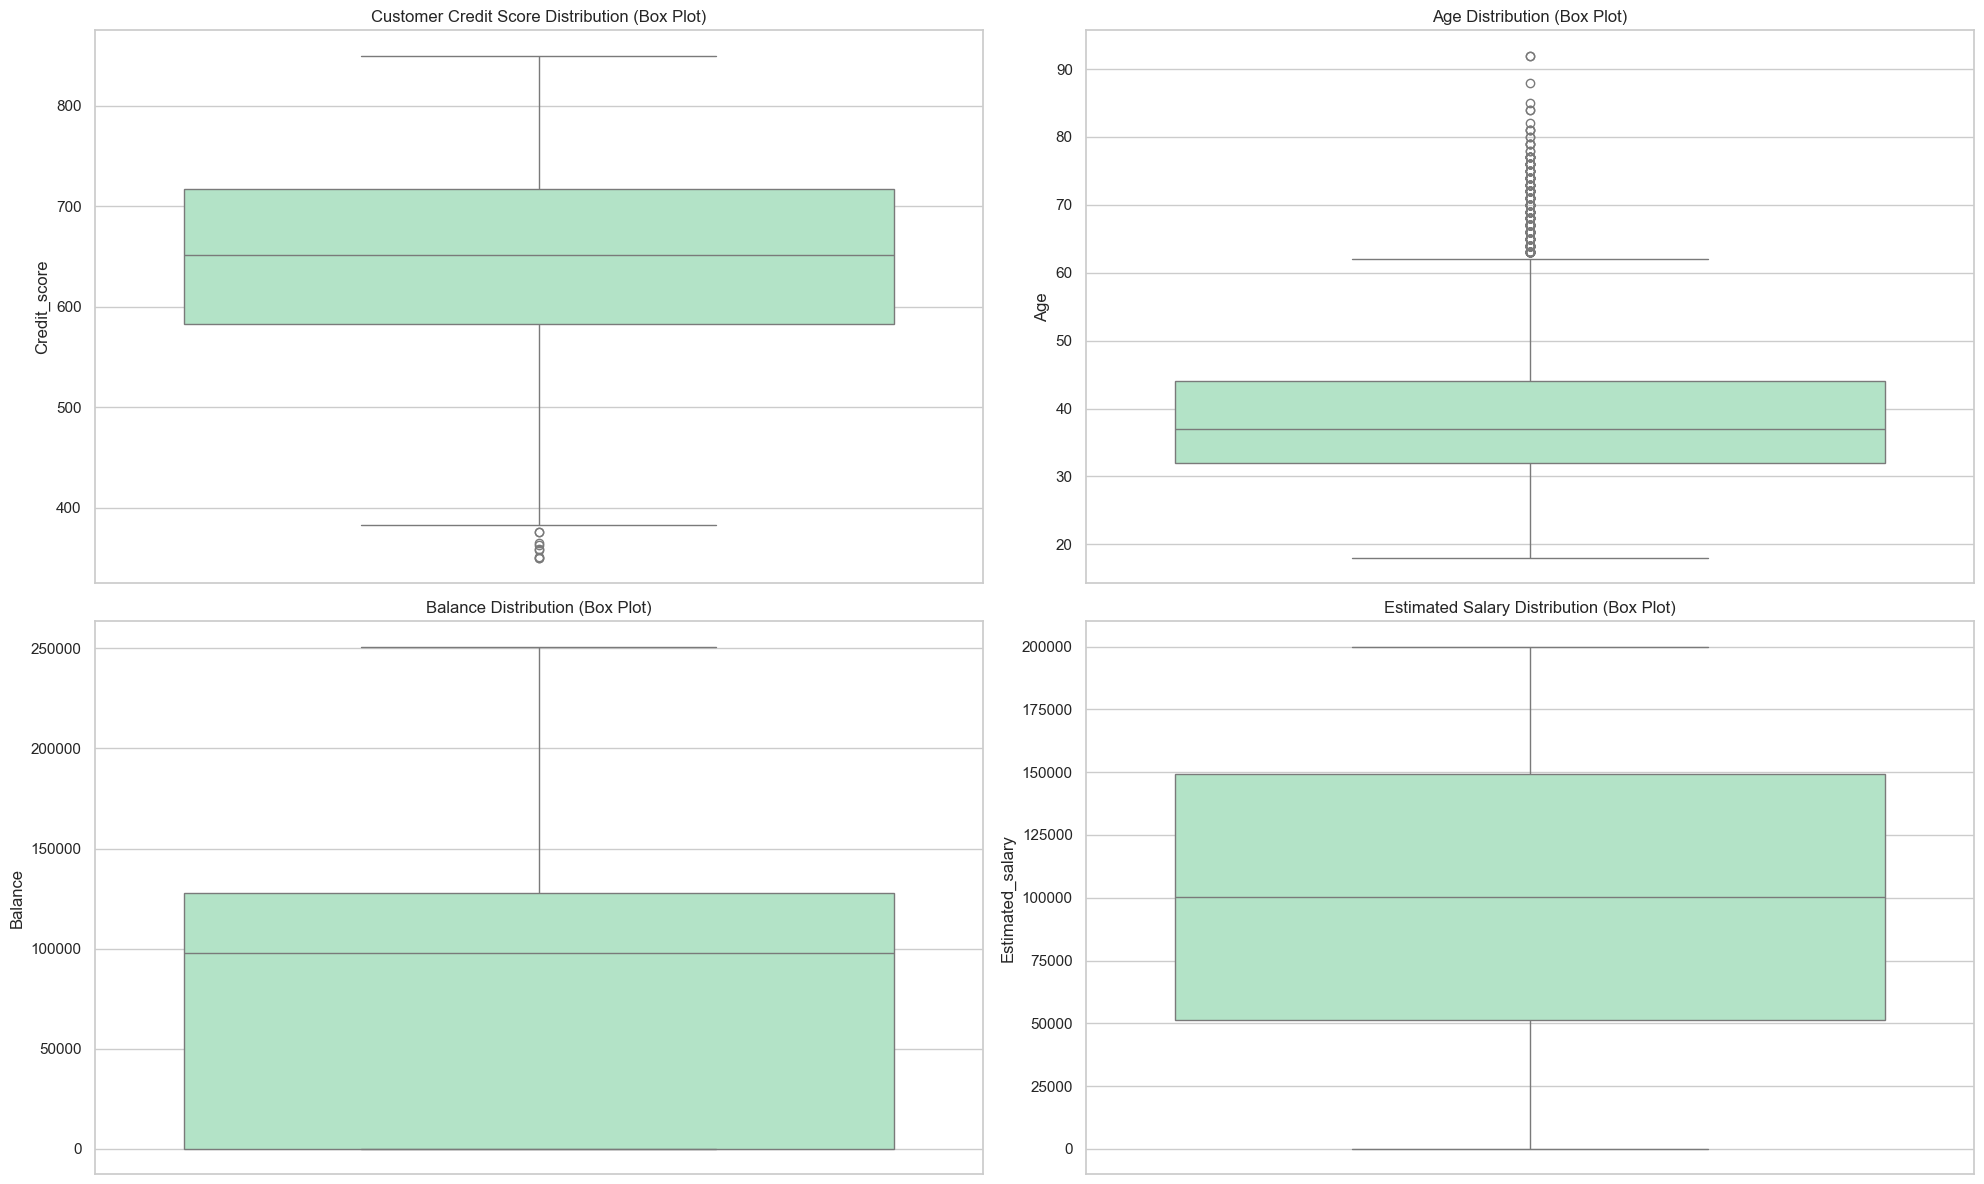

In [102]:
# Call the function with your dataframe
plot_boxplots(customers_train, columns, box_plot_titles)

## Insights from Boxplots of Continuous Variables

### Credit Score Distribution
**Observations:**
- A few outliers below **400** indicate customers with exceptionally low credit scores.
- These low credit score customers may require special attention, as they could represent a higher risk of exiting.
- The majority of customers have a good credit history, suggesting potential stability in retention rates.

### Age Distribution
**Observations:**
- The median age lies approximately between **37 and 39 years**, with most customers falling in the **32–43** age range.
- A small number of outliers appear above **62 years**, representing older customers.
- Middle-aged customers seem to be the primary focus group for retention strategies.

### Balance Distribution
**Observations:**
- The median balance is around **$100,000** (assuming the unit is dollars), with no prominent outliers.
- The balance distribution appears well spread across the customer base.
- Customers with very low balances may be at a higher risk of churn and could benefit from targeted engagement strategies; this should be explored further in **bivariate analysis**.

### Estimated Salary Distribution
**Observations:**
- Estimated salary is almost **uniformly distributed**, with most customers earning between **$50,000 and $150,000**.
- No significant outliers are present in this variable.
- Salary is unlikely to introduce bias into the model.


## 4.1.2 Bivariate and Multivariate Analysis

After understanding individual variables, we will proceed with **bivariate** and **multivariate analysis** to explore relationships between variables.

### 1. Bivariate Analysis

In bivariate analysis, we aim to understand how one variable relates to another. The following relationships will be explored:

#### Categorical vs. Target (`Exited`)
- **Count plots** will be used to study the relationship between categorical variables and the target variable.
- Variables to be analyzed include:
  - `Geography`
  - `Gender`
  - `NumOfProducts`
  - `Tenure`
  - `IsActiveMember`
  - `HasCrCard`
  - `Exited`

#### Continuous vs. Target (`Exited`)
- **Box plots** will be used to observe how continuous variables differ between customers who exited (`Exited = 1`) and those who did not (`Exited = 0`).
- Continuous variables include:
  - `CreditScore`
  - `Age`
  - `Balance`

#### Continuous vs. Continuous (Pair Plot)
- **Scatter plots** (using pair plots) will be used to explore relationships and potential correlations between continuous variables such as:
  - `Balance`
  - `EstimatedSalary`


### 2. Multivariate Analysis

#### Correlation Between Continuous Variables
- A **correlation heatmap** will be used to visualize pairwise correlations among continuous variables.
- Variables included in this analysis are:
  - `CreditScore`
  - `Age`
  - `Balance`
  - `EstimatedSalary`

- This visualization will help identify **strong positive or negative correlations** that may impact model performance, indicate multicollinearity, or provide insights into underlying relationships between features.
- For example, highly correlated variables may require special handling during feature selection or model training.


In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_barplots_with_target(df, columns, target_col, titles, figsize=(15, 18)):

    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Determine the number of rows and columns needed for the subplots
    n_cols = 2  # Number of plots in each row
    n_rows = (len(columns) + 1) // n_cols  # Calculate rows required to fit all columns
    
    # Loop through the columns and titles and create subplots
    for i, (col, title) in enumerate(zip(columns, titles)):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.gca().set_title(title)
        sns.countplot(data=df, x=col, hue=target_col, palette="Set1")
        plt.xlabel(col.capitalize())
        plt.ylabel("Count")
        plt.legend(title=target_col.capitalize())
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2)
    plt.show()

# Example usage
columns = ['geography', 'gender', 'num_of_products', 'tenure', 'is_active_member', 'has_credit_card']
titles = [
    'Customer Geography Distribution by Exited',
    'Customer Gender Distribution by Exited',
    'Number of Products Distribution by Exited',
    'Customer Tenure Distribution by Exited',
    'Active Membership Status by Exited',
    'Credit Card Ownership by Exited'
]

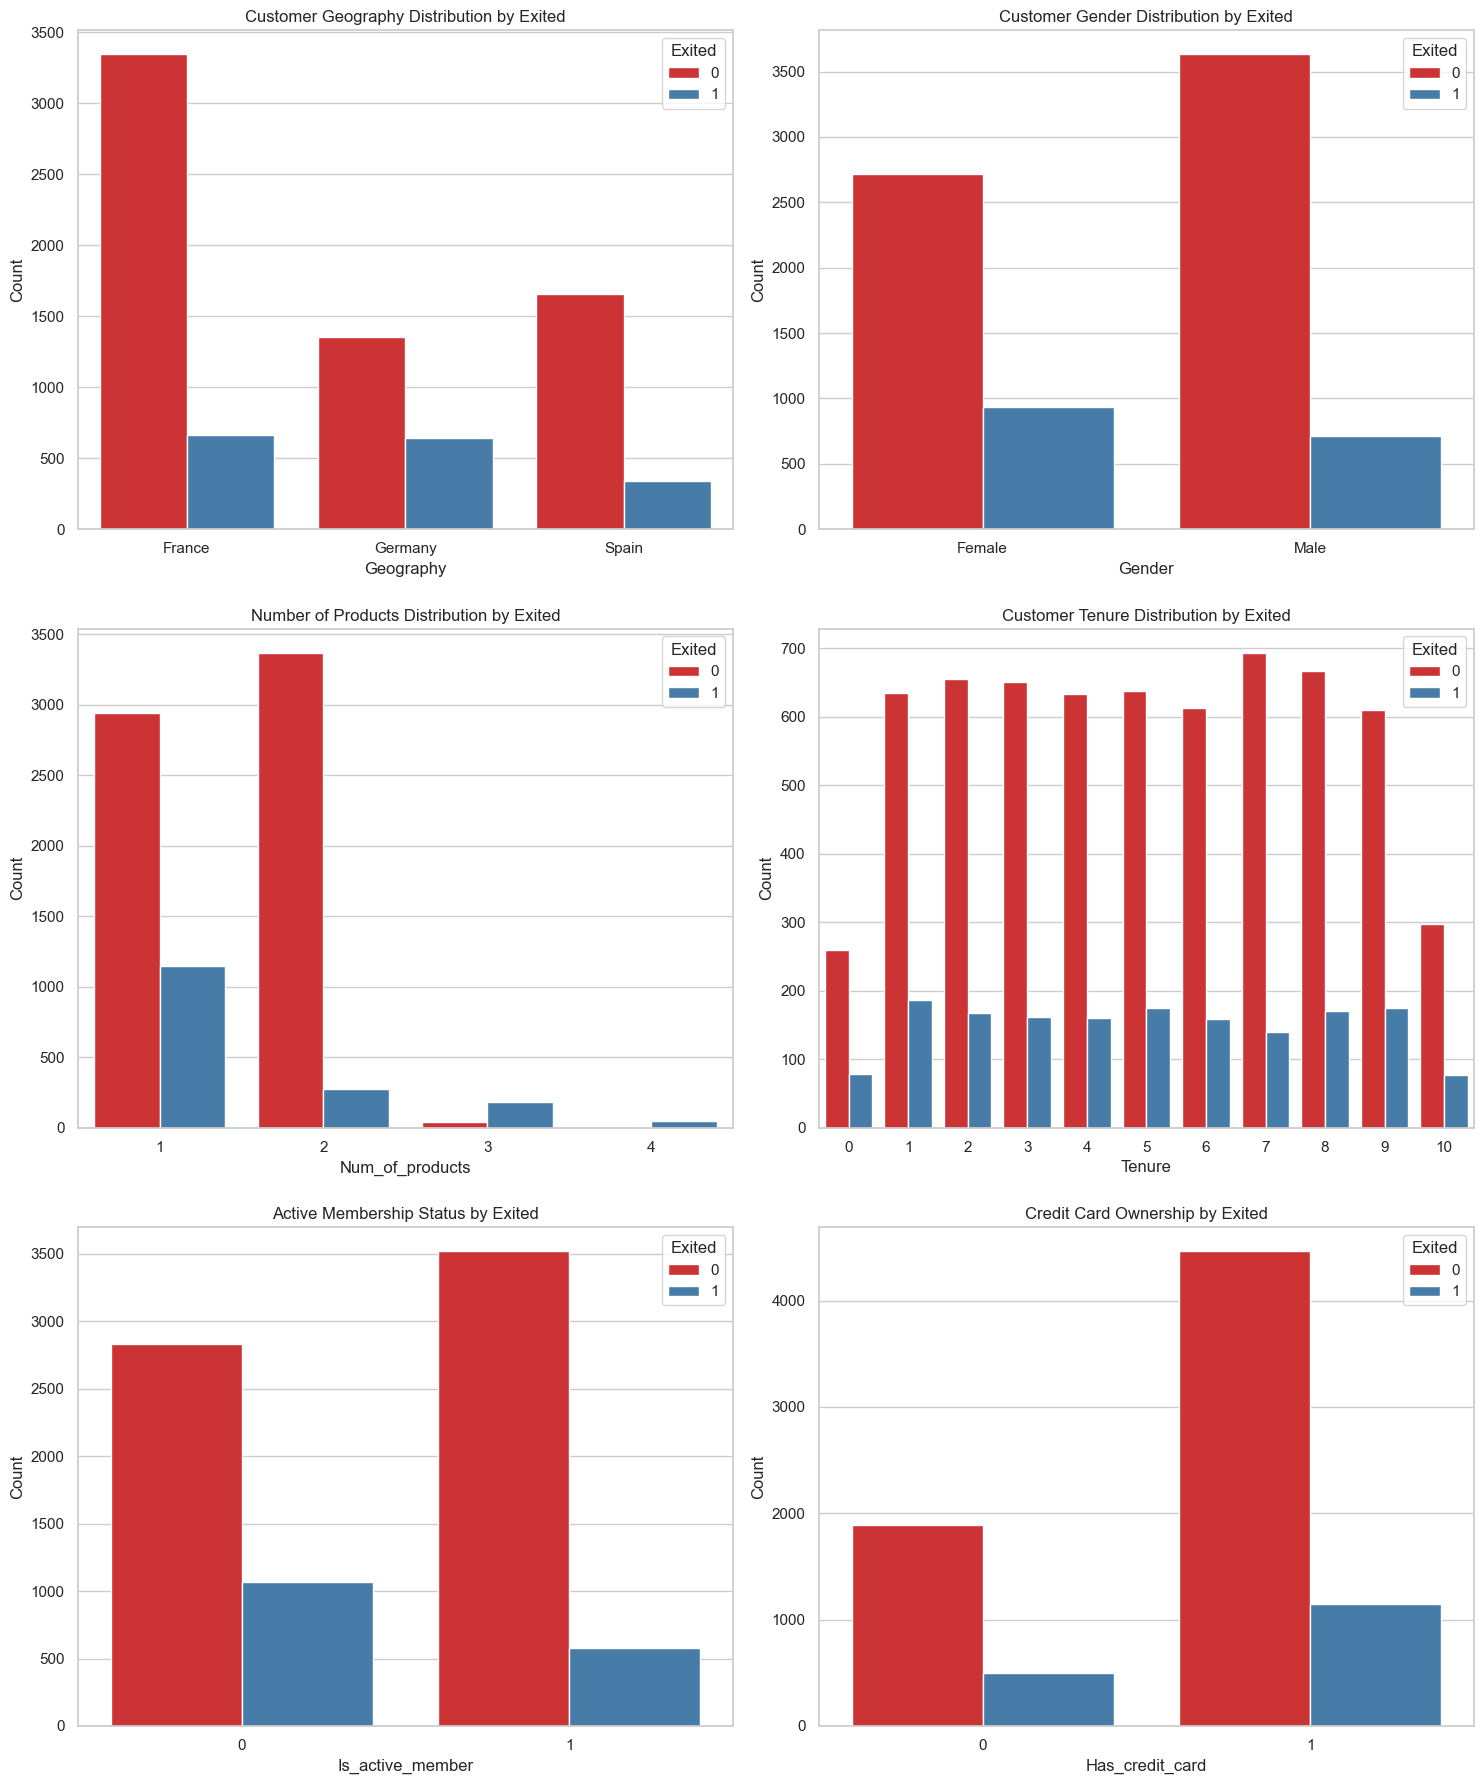

In [104]:
plot_barplots_with_target(customers_train, columns, target_col='exited', titles=titles)


In [105]:
# Compute churn rate by geography
churn_rate_by_geography = customers_train.groupby('geography', observed=False)['exited'].mean() * 100

# Convert the result to a DataFrame
churn_rate_df = churn_rate_by_geography.reset_index()

# Rename the columns for better readability
churn_rate_df.columns = ['Geography', 'Churn Rate (%)']

# Display the DataFrame
churn_rate_df

,Geography,Churn Rate (%)
0,France,16.558603
1,Germany,32.280702
2,Spain,16.992481


## Insights from Count Plots of Categorical Variables

### Geography
**Observations:**
- Customers from **France** form the majority, followed by **Spain** and **Germany**.
- **Germany** shows an approximately **twice higher proportion of exited customers (32.28%)** compared to France and Spain.
- Geography may influence churn rates; however, further analysis with additional variables is required to draw definitive conclusions.


### Gender
**Observations:**
- Both **male** and **female** customers are well represented in the dataset.
- **Female customers** appear to have a slightly higher churn rate compared to male customers.
- Overall, gender alone does not provide strong insights into customer churn behavior.


### Number of Products
**Observations:**
- Most customers use **1 or 2 products**.
- Customers with **only 1 product** show a higher churn rate compared to those using more products.
- However, since a large portion of customers fall into this category, it does not provide strong discriminatory power.
- Overall, the number of products used does not offer deep insight for robust churn classification on its own.


### Tenure
**Observations:**
- Tenure is fairly evenly distributed across customers.
- No clear trend is observed between tenure and churn.
- Tenure alone may not be a strong predictor of churn, but it could have predictive value when combined with other features.


### IsActiveMember
**Observations:**
- Active members have a **significantly lower churn rate** compared to inactive members.
- This variable serves as a **mild indicator of churn**, with inactive members being at a higher risk of exiting.


### HasCreditCard
**Observations:**
- Customers with credit cards form the **majority** of the dataset.
- Churn rates are **similar** for customers with and without credit cards.

**Implications:**
- Credit card ownership does not strongly influence churn on its own.
- However, it may still have meaningful interactions with other features.

### Conclusion
- Some variables, such as **IsActiveMember** and **Geography**, provide useful insights into customer churn behavior.
- Other variables, including **Tenure** and **HasCreditCard**, show weaker or unclear relationships with churn.
- Overall, churn appears to be driven by a **combination of factors** rather than any single variable in isolation.

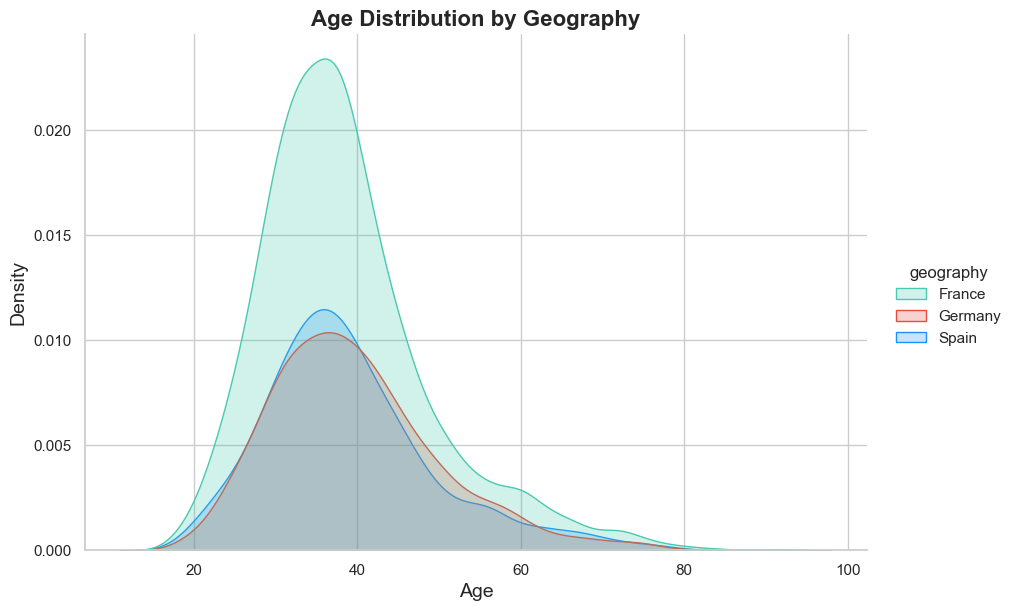

In [106]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Create the displot
sns.displot(
    data=customers_train,
    x='age',
    hue='geography',  # Different regions
    kind='kde',       # Kernel Density Estimate plot
    fill=True,        # Fill the areas under the curves
    palette=['#48c9b0', '#e74c3c', '#1E90FF'],  # Nice colors for regions
    height=6,         # Adjust height
    aspect=1.5        # Adjust aspect ratio
)

# Add labels and title
plt.title('Age Distribution by Geography', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

Based on the above Plot, we see that the age between 25 to 50 is most dense for the country of France as its numbers were also more in the dataset.

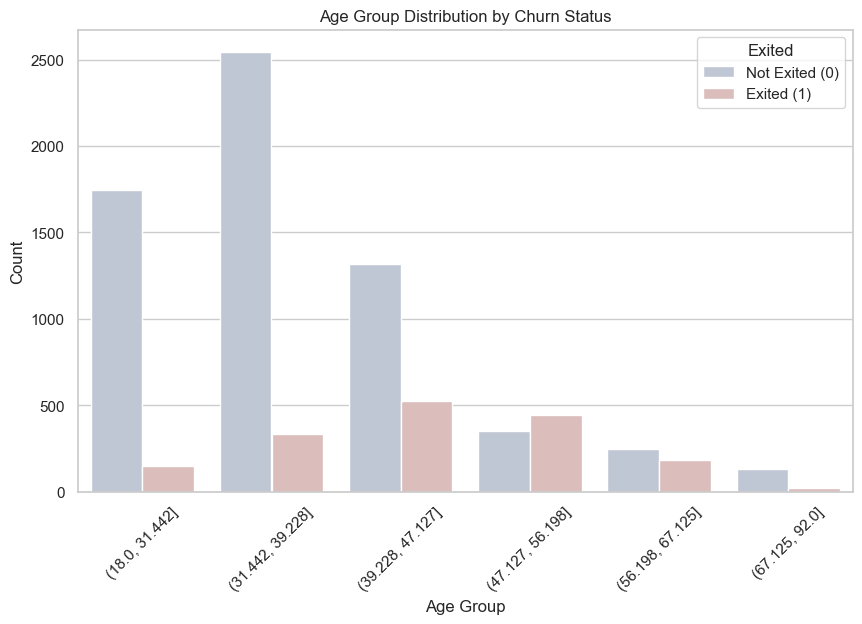

In [107]:
# Initialize KBinsDiscretizer with desired settings
discretizer = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='kmeans', subsample=None)

# Fit the discretizer on the training data and transform both train and test data
customers_train['age_code'] = discretizer.fit_transform(customers_train[['age']])
customers_train['age_group'] = pd.cut(x=customers_train['age'],
                                    bins=discretizer.bin_edges_[0].tolist())
customers_test['age_code'] = discretizer.transform(customers_test[['age']])
customers_test['age_group'] = pd.cut(x=customers_train['age'],
                                    bins=discretizer.bin_edges_[0].tolist())


# Create a count plot for age groups with hue for 'Exited'
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_train, x='age_group', hue='exited', palette='vlag')
plt.title('Age Group Distribution by Churn Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Exited', labels=['Not Exited (0)', 'Exited (1)'])
plt.show()

In [108]:
customers_train.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,exited,post_exit_questionnaire,age_code,age_group
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2.0,"(39.228, 47.127]"
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,2.0,"(39.228, 47.127]"
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,2.0,"(39.228, 47.127]"
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,1.0,"(31.442, 39.228]"
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,2.0,"(39.228, 47.127]"


Based on the above data we see, that most of the customers who have exited lie in between 46-55 range

In [109]:
# Compute churn rate by age group
churn_rate_age = customers_train.groupby('age_group', observed=False)['exited'].mean() * 100

# Compute total frequency of each age group
total_frequency = customers_train['age_group'].value_counts()

# Compute frequency of customers who have exited for each age group
exited_frequency = customers_train[customers_train['exited'] == 1]['age_group'].value_counts()

# Create a DataFrame from these values
churn_rate_age_df = churn_rate_age.reset_index()
churn_rate_age_df.columns = ['Age Group', 'Churn Rate (%)']

# Add total frequency and exited frequency columns
churn_rate_age_df['Total Customers'] = churn_rate_age_df['Age Group'].map(total_frequency)
churn_rate_age_df['Exited Customers'] = churn_rate_age_df['Age Group'].map(exited_frequency)

# # Fill any missing values (if some age groups have no exited customers)
# churn_rate_age_df['Exited Frequency'] = churn_rate_age_df['Exited Frequency'].fillna(0).astype(int)

# Display the DataFrame
churn_rate_age_df

,Age Group,Churn Rate (%),Total Customers,Exited Customers
0,"(18.0, 31.442]",7.720783,1891,146
1,"(31.442, 39.228]",11.501042,2878,331
2,"(39.228, 47.127]",28.579176,1844,527
3,"(47.127, 56.198]",55.822785,790,441
4,"(56.198, 67.125]",42.361111,432,183
5,"(67.125, 92.0]",11.920530,151,18


## Age Group Analysis

- The **46–55** and **56–65** age groups exhibit the **highest churn rates**, at approximately **48%** and **52%**, respectively. This indicates that customers in these age ranges are significantly more likely to leave compared to other groups.

- Younger age groups show much lower churn:
  - **0–25:** ~**8%**
  - **26–35:** ~**7%**
- The **36–45** age group has a **moderate churn rate** of around **18%**.

- Customers aged **66+** also demonstrate a **moderate churn rate** of approximately **16%**.

- Overall, this analysis suggests a need to **focus retention strategies on middle-aged and older customers**, particularly those between **46 and 65 years**, to better understand their needs and improve engagement.


In [110]:
def plot_boxplots_with_target(df, continuous_vars, target_col, titles, figsize=(12, 10)):

    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Determine the number of rows and columns needed for the subplots
    n_cols = 2  # Number of plots in each row
    n_rows = (len(continuous_vars) + 1) // n_cols  # Calculate rows required to fit all variables
    
    # Loop through the continuous variables and their corresponding titles
    for i, (cont_var, title) in enumerate(zip(continuous_vars, titles)):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(data=df, x=target_col, y=cont_var, palette="crest", hue = target_col)
        plt.title(title)
        plt.xlabel(target_col.capitalize())
        plt.ylabel(cont_var.capitalize())
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.2)
    plt.show()

# Example usage
continuous_vars = ['credit_score', 'age', 'balance', 'estimated_salary']
titles = [
    'Credit Score Distribution by Exited',
    'Age Distribution by Exited',
    'Balance Distribution by Exited',
    'Estimated Salary Distribution by Exited'
]

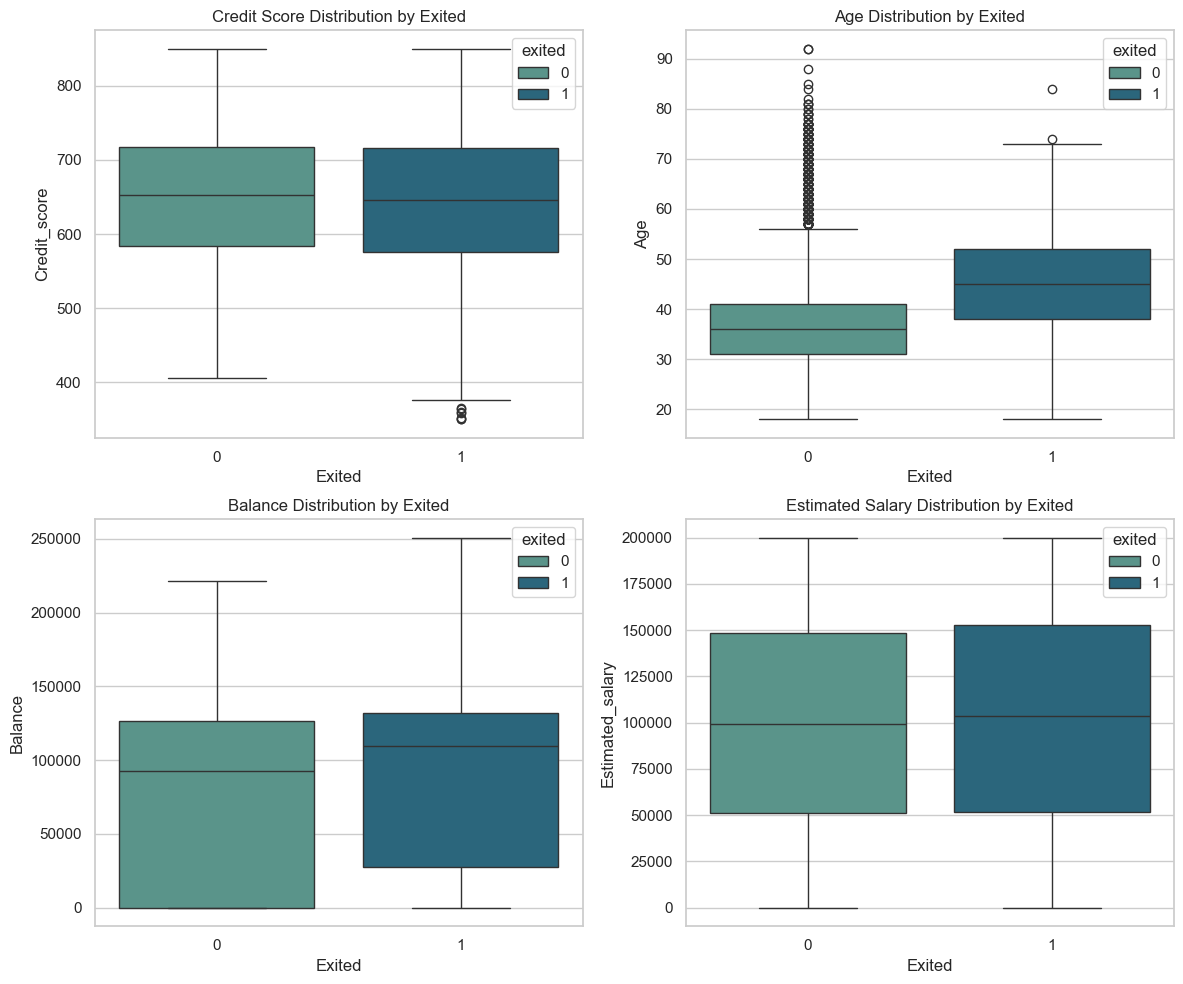

In [111]:
plot_boxplots_with_target(customers_train, continuous_vars, target_col='exited', titles=titles)

## Key Insights from Boxplots of Continuous Variables vs. Target Variable (Exited)

### 1. Age vs. Exited
- Customers who have exited (**Exited = 1**) tend to be **older** than those who stayed (**Exited = 0**).
- The median age of churned customers is noticeably higher, indicating a clear separation between the two groups.

**Insight:**  
Age shows a strong relationship with churn and appears to be an important predictor. Older customers are more likely to leave, suggesting that age-specific retention strategies may be beneficial.

---

### 2. Balance vs. Exited
- Customers who exited have a **higher median account balance** compared to those who stayed.
- The distribution indicates that many high-balance customers are present in the churned group.

**Insight:**  
This is a surprising but critical finding: **high-value customers with significant balances are leaving**. Targeted retention efforts should be prioritized for this segment, as their churn can have a substantial financial impact.


In [112]:
def plot_categorical_boxplots_with_target(df, categorical_vars, continuous_vars, target_col, titles, figsize=(15, 15)):
  
    # Set up the figure size
    plt.figure(figsize=figsize)
    
    # Determine the number of rows and columns needed for the subplots
    n_cols = 2  # Number of plots in each row
    n_rows = len(categorical_vars)  # One plot per categorical variable
    
    # Loop through the categorical variables and their corresponding continuous variables
    for i, (cat_var, cont_var, title) in enumerate(zip(categorical_vars, continuous_vars, titles)):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(data=df, x=cat_var, y=cont_var, hue=target_col, palette="mako")
        plt.title(title)
        plt.xlabel(cat_var.capitalize())
        plt.ylabel(cont_var.capitalize())
    
    # Adjust layout for better spacing
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.4)
    plt.show()

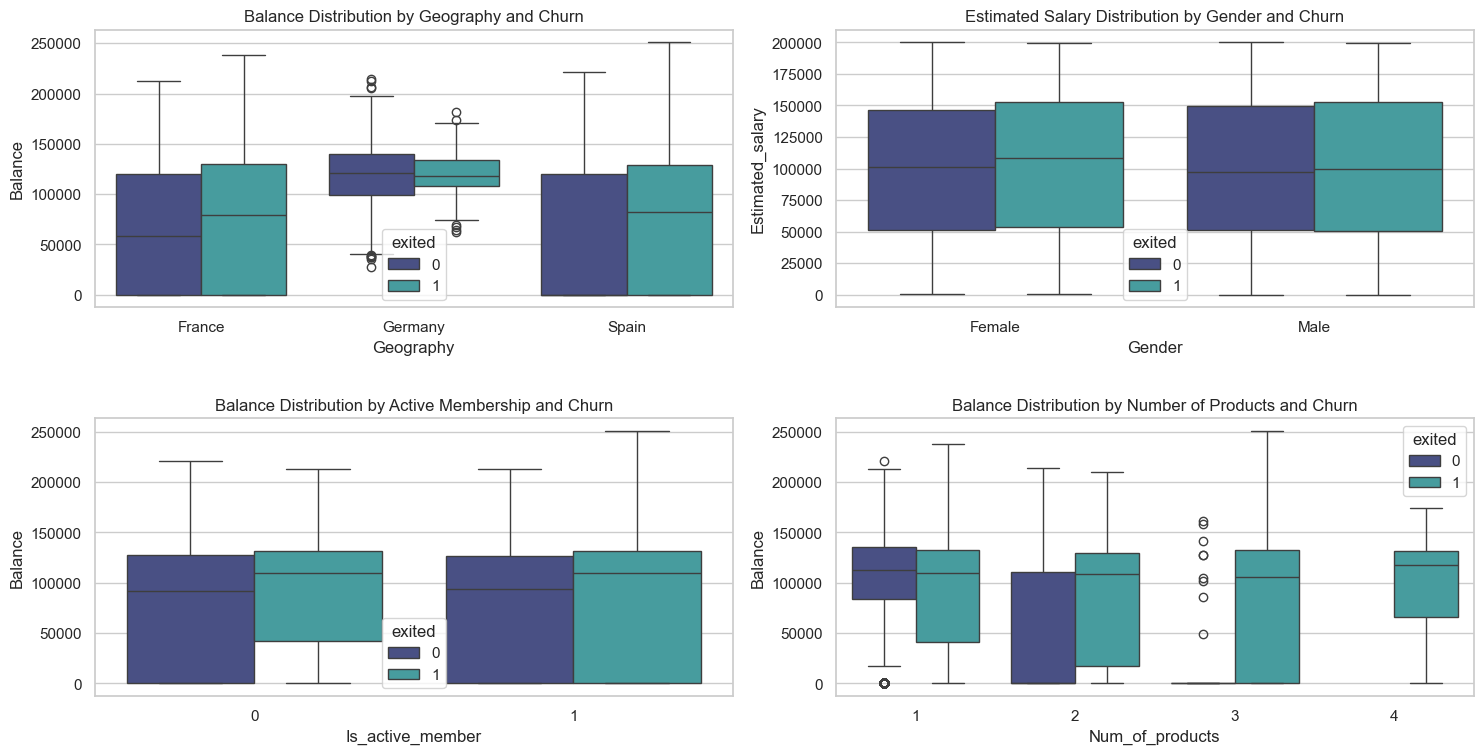

In [113]:
# Variables to analyze
categorical_vars = ['geography', 'gender', 'is_active_member', 'num_of_products']
continuous_vars = ['balance', 'estimated_salary', 'balance', 'balance']
titles = [
    'Balance Distribution by Geography and Churn',
    'Estimated Salary Distribution by Gender and Churn',
    'Balance Distribution by Active Membership and Churn',
    'Balance Distribution by Number of Products and Churn'
]

# Call the function
plot_categorical_boxplots_with_target(customers_train, categorical_vars, continuous_vars, target_col='exited', titles=titles)


## Balance Distribution by Geography and Churn

**Insight:**  
Customers from **Germany** with higher account balances are more likely to churn compared to customers from **France** and **Spain**.  
- France shows a relatively **uniform balance distribution** across both churned and non-churned customers.  
- Spain exhibits **similar balance patterns** for both categories, indicating less separation based on balance.

**Usefulness:**  
This suggests that **regional differences play an important role in churn behavior**. Balance alone is not sufficient to explain churn, and other factors (e.g., regional policies, customer expectations, or service quality) should be considered when modeling churn across geographies.

---

## Balance Distribution by Number of Products and Churn

**Insight:**  
Customers holding **three or more products** show a **higher likelihood of churning**, particularly those with **lower account balances**.

**Usefulness:**  
This indicates that having more products does not necessarily increase customer loyalty. Instead, it may introduce complexity or dissatisfaction, especially for low-balance customers. Product bundling and customer experience strategies should be reviewed for this segment.


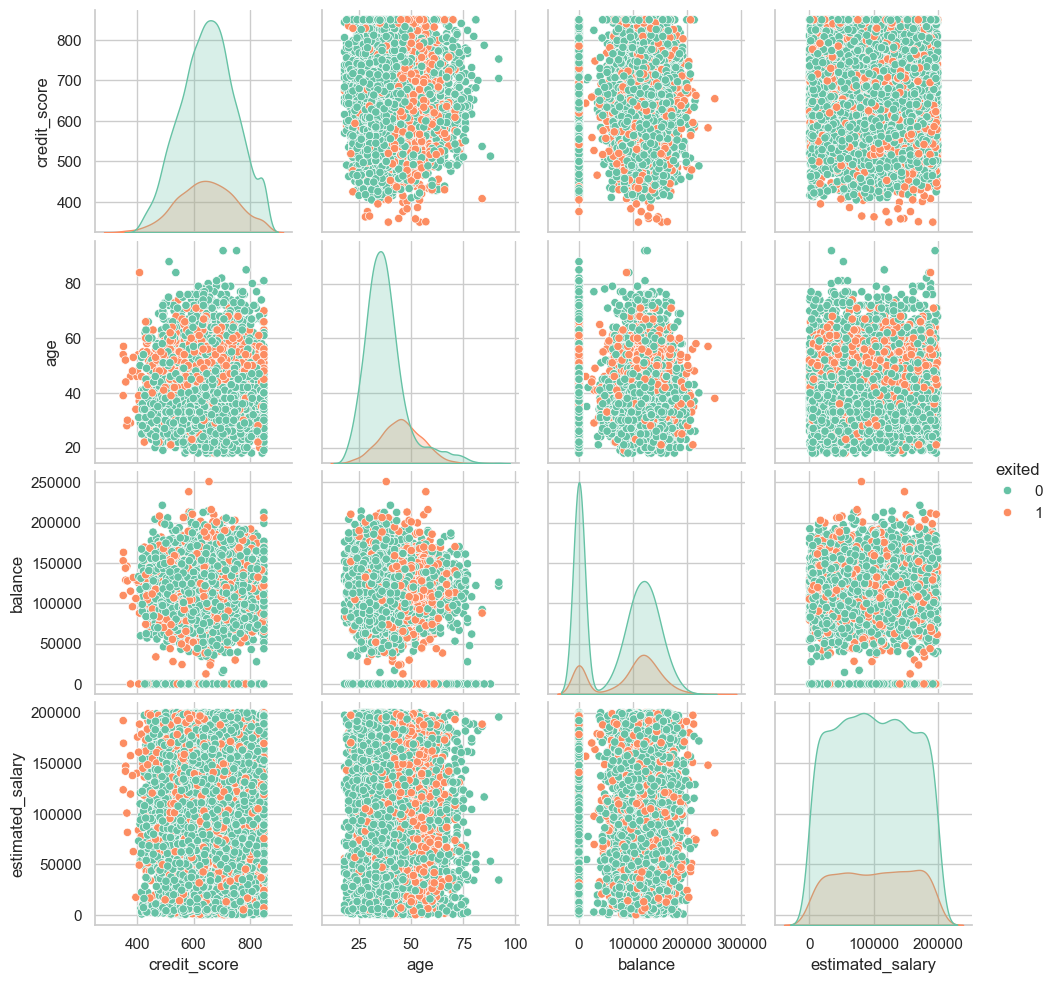

In [114]:
columns = ['credit_score', 'age', 'balance', 'estimated_salary', 'exited']
sns.pairplot(customers_train[columns], hue='exited', palette='Set2')
plt.show()

By looking at the scatter lots of different continuous variables, we dont see any visible pattern to clearly separate our target variable



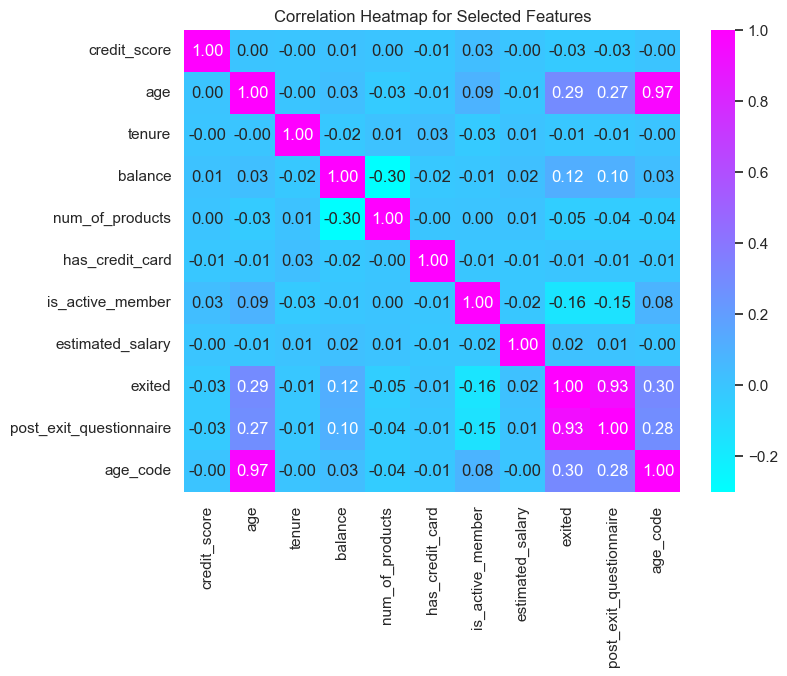

In [115]:
selected_columns = ['credit_score', 'age', 'tenure', 'balance',
       'num_of_products', 'has_credit_card', 'is_active_member',
       'estimated_salary', 'exited', 'post_exit_questionnaire','age_code']
subset_data = customers_train[selected_columns]

# Calculate the correlation matrix for the selected columns
correlation_matrix = subset_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="cool", cbar=True)
plt.title("Correlation Heatmap for Selected Features")
plt.show()

By looking at the heatmap above we notice that there is a negative correlation of isActiveMember with the exit variable. Besides this Age and balance also looks promising columns. The rest of the columns have very low correlation but maybe could help together in better classification. Also, we need to remove post exit questionnaire column as despite high correlation with target variable as it was taken after the customer exit status.

### 5. Feature Engineering

First, we drop the `post_questionnaire` column due to its high collinearity with the target variable.  
This high correlation is expected, as observed in the previous analysis.


In [116]:
# Dropping Questionnaire column
customers_train.drop(columns = "post_exit_questionnaire", inplace = True)
customers_test.drop(columns = "post_exit_questionnaire", inplace = True)

Now, as most of the customers have *0 balance* and are using *less than 3 products*, we are creating two new features here. Will see later their effect

In [117]:
def create_zero_balance_feature(df):
    df["zero_balance"] = (df["balance"] == 0).astype(int)
    return df

def products_greater_than_zero_feature(df):
    df["products_greater_than_two"] = (df["num_of_products"] > 2).astype(int)
    return df

customers_train = create_zero_balance_feature(customers_train)
customers_test = create_zero_balance_feature(customers_test)

customers_train = products_greater_than_zero_feature(customers_train)
customers_test = products_greater_than_zero_feature(customers_test)

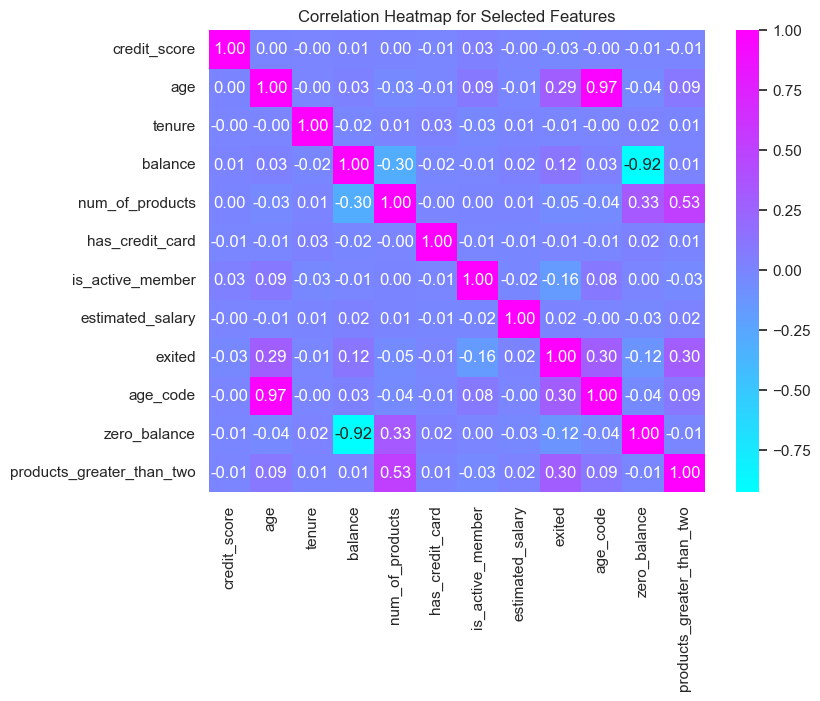

In [118]:
selected_columns = ['credit_score', 'age', 'tenure', 'balance',
       'num_of_products', 'has_credit_card', 'is_active_member',
       'estimated_salary', 'exited','age_code', 'zero_balance', 'products_greater_than_two']
subset_data = customers_train[selected_columns]

# Calculate the correlation matrix for the selected columns
correlation_matrix = subset_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="cool", cbar=True)
plt.title("Correlation Heatmap for Selected Features")
plt.show()